In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import csv
import gzip
import scipy.io

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

os.chdir('/Users/rongyuying/Lab')

np.random.seed(1234)

sc.settings.verbosity = 3
sc.logging.print_header()


scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.19.2 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.10.4 louvain==0.7.0


In [2]:
# import rna data and metadata

rna_data = scipy.sparse.csr_matrix(scipy.io.mmread('out/rna/rna_matrix.mtx').transpose()).copy()
rna_label = pd.read_csv('out/rna/rna_metadata.csv', index_col = 0)

# import rna barcodes
f = open('out/rna/rna_barcodes.tsv', 'r')
rna_barcodes = np.array(f.read().split())
f.close()
print(len(rna_barcodes))
# 10338 is correct

# import rna features
f = open('out/rna/rna_features.tsv', 'r')
rna_features = np.array(f.read().split())
f.close()
print(len(rna_features))
# 29717 is correct

# create AnnData obj
adata_rna = anndata.AnnData(rna_data, dtype='float32')
print(adata_rna.shape)
# (10338, 29717)

10338
29717
  (0, 9)	1.0
  (0, 36)	1.0
  (0, 41)	1.0
  (0, 47)	1.0
  (0, 72)	1.0
  (0, 91)	1.0
  (0, 95)	1.0
  (0, 107)	1.0
  (0, 127)	1.0
  (0, 129)	6.0
  (0, 135)	1.0
  (0, 138)	1.0
  (0, 150)	3.0
  (0, 167)	3.0
  (0, 170)	2.0
  (0, 172)	1.0
  (0, 181)	1.0
  (0, 183)	4.0
  (0, 186)	1.0
  (0, 209)	1.0
  (0, 242)	5.0
  (0, 252)	2.0
  (0, 268)	2.0
  (0, 272)	1.0
  (0, 281)	1.0
  :	:
  (10337, 29493)	1.0
  (10337, 29529)	2.0
  (10337, 29599)	1.0
  (10337, 29604)	1.0
  (10337, 29605)	2.0
  (10337, 29610)	1.0
  (10337, 29617)	1.0
  (10337, 29622)	1.0
  (10337, 29625)	20.0
  (10337, 29627)	2.0
  (10337, 29641)	1.0
  (10337, 29659)	1.0
  (10337, 29691)	17.0
  (10337, 29692)	40.0
  (10337, 29693)	26.0
  (10337, 29694)	50.0
  (10337, 29695)	4.0
  (10337, 29696)	59.0
  (10337, 29697)	35.0
  (10337, 29698)	37.0
  (10337, 29699)	1.0
  (10337, 29700)	28.0
  (10337, 29701)	9.0
  (10337, 29702)	1.0
  (10337, 29703)	29.0


In [3]:
# rna continued

adata_rna.obs.index = rna_barcodes
print(len(rna_label['predicted.celltype.l2']))
# 10338

adata_rna.obs['cell_type'] = rna_label['predicted.celltype.l2'].values.astype(str)
adata_rna.obs['data_type'] = 'rna'

adata_rna.var.index = rna_features

10338


In [4]:
len(rna_barcodes)

10338

In [5]:
# import atac data

atac_data = scipy.sparse.csr_matrix(scipy.io.mmread('out/atac/atac_matrix.mtx').transpose()).copy()

atac_label = pd.read_csv('out/atac/atac_metadata.csv', index_col = None)

print(len(atac_label))
# 9939

# import atac barcodes
f = open('out/atac/atac_barcodes.tsv', 'r')
atac_barcodes = np.array(f.read().split())
f.close()
print(len(atac_barcodes))
# 9939

#atac_features = read()
f = open('out/atac/atac_features.tsv', 'r')
atac_features = np.array(f.read().split())
f.close()
print(len(atac_features))
# 24919

adata_atac = anndata.AnnData(atac_data, dtype='float32')
print(adata_atac.shape)
# (9939, 24919)

9939
9939
24919
AnnData object with n_obs × n_vars = 9939 × 24919


In [6]:
len(atac_barcodes)

9939

In [7]:
# atac continued
adata_atac.obs.index = atac_barcodes
adata_atac.obs['cell_type'] = atac_label['predicted.celltype.l2'].values.astype(str)
adata_atac.obs['data_type'] = 'atac'

adata_atac.var.index = atac_features


In [11]:
meta_rna = adata_rna.obs
meta_atac = adata_atac.obs

meta = pd.concat([meta_rna, meta_atac], axis=0)

print(meta.shape)
# (20277, 2)
# 10338 + 9939 = 20277, nCell_rna + nCell_atac
# two cols: cell_type, data_type

In [15]:
import portal

# Specify the GPU device
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

# Create a folder for saving results
result_path = "./result"
if not os.path.exists(result_path):
    os.makedirs(result_path)

/usr/local/Caskroom/miniconda/base/envs/portal/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


Finding highly variable genes...


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
/usr/local/Caskroom/miniconda/base/envs/portal/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell


Normalizing and scaling...


    finished (0:00:00)
/usr/local/Caskroom/miniconda/base/envs/portal/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:01)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Dimensionality reduction via PCA...
Begining time:  Thu Mar 16 15:30:08 2023
step 0, loss_D=6.928180, loss_GAN=2.492953, loss_AE=75.844887, loss_cos=19.656906, loss_LA=53.024067
step 200, loss_D=6.025909, loss_GAN=6.225245, loss_AE=7.039446, loss_cos=3.968260, loss_LA=1.055156
step 400, loss_D=6.086779, loss_GAN=6.306031, loss_AE=5.026643, loss_cos=2.771010, loss_LA=0.605255
step 600, loss_D=6.067570, loss_GAN=6.412763, loss_AE=4.295620, loss_cos=2.666416, loss_LA=0.467559
step 800, loss_D=5.905995, loss_GAN=6.457953, loss_AE=3.862907, loss_cos=2.528266, loss_LA=0.365218
step 1000, loss_D=6.068567, loss_GAN=6.644361, loss_AE=3.758308, loss_cos=2.695393, loss_LA=0.352947
step 1200, loss_D=5.807058, loss_GAN=6.620751, loss_AE=3.524913, loss_cos=2.420782, loss_LA=0.309444
step 1400, loss_D=5.904190, loss_GAN=6.672950, loss_AE=3.539512, loss_cos=2.545433, loss_LA=0.291827
step 1600, loss_D=5.810254, loss_GAN=6.687518, loss_AE=3.531717, loss_cos=2.379275, loss_LA=0.272980
step 1800, loss_D=

... storing 'cell_type' as categorical
... storing 'data_type' as categorical


Thu Mar 16 15:39:38 2023 Finished embedding


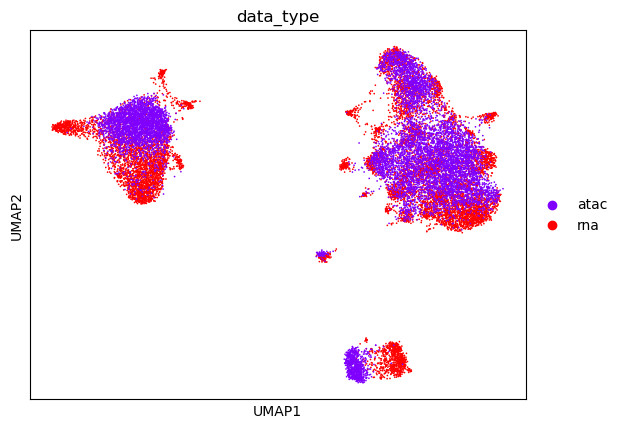

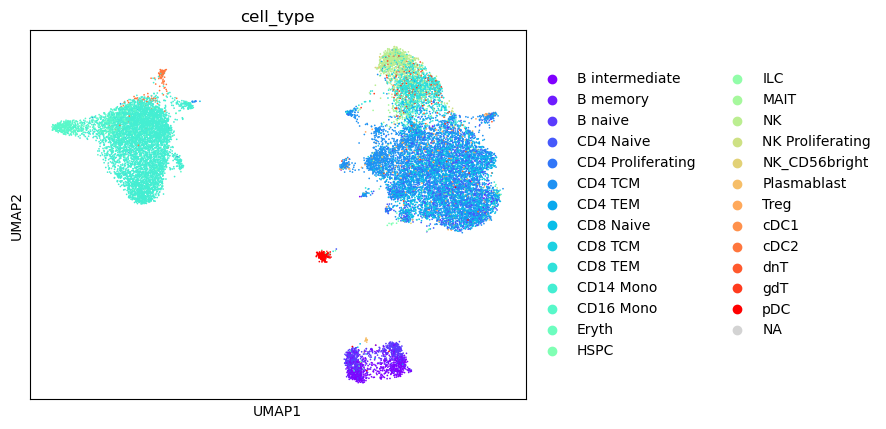

In [16]:
model = portal.model.Model(training_steps=3000, lambdacos=10.0)
model.preprocess(adata_rna, adata_atac) # perform preprocess and PCA
model.train() # train the model
model.eval() # get integrated latent representation of cells

portal.utils.plot_UMAP(model.latent, meta, colors=["data_type", "cell_type"], save=True, result_path=result_path)


In [17]:
import umap
import matplotlib.pyplot as plt


reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)

embedding = reducer.fit_transform(model.latent)

n_cells = embedding.shape[0]
size = 120000 / n_cells


UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation',
     min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1,
     verbose=True)
Construct fuzzy simplicial set
Thu Mar 16 16:54:58 2023 Finding Nearest Neighbors
Thu Mar 16 16:54:58 2023 Building RP forest with 12 trees
Thu Mar 16 16:54:58 2023 NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
Thu Mar 16 16:55:06 2023 Finished Nearest Neighbor Search
Thu Mar 16 16:55:07 2023 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Mar 16 16:55:30 2023 Finished embedding


scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.19.2 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.10.4 louvain==0.7.0


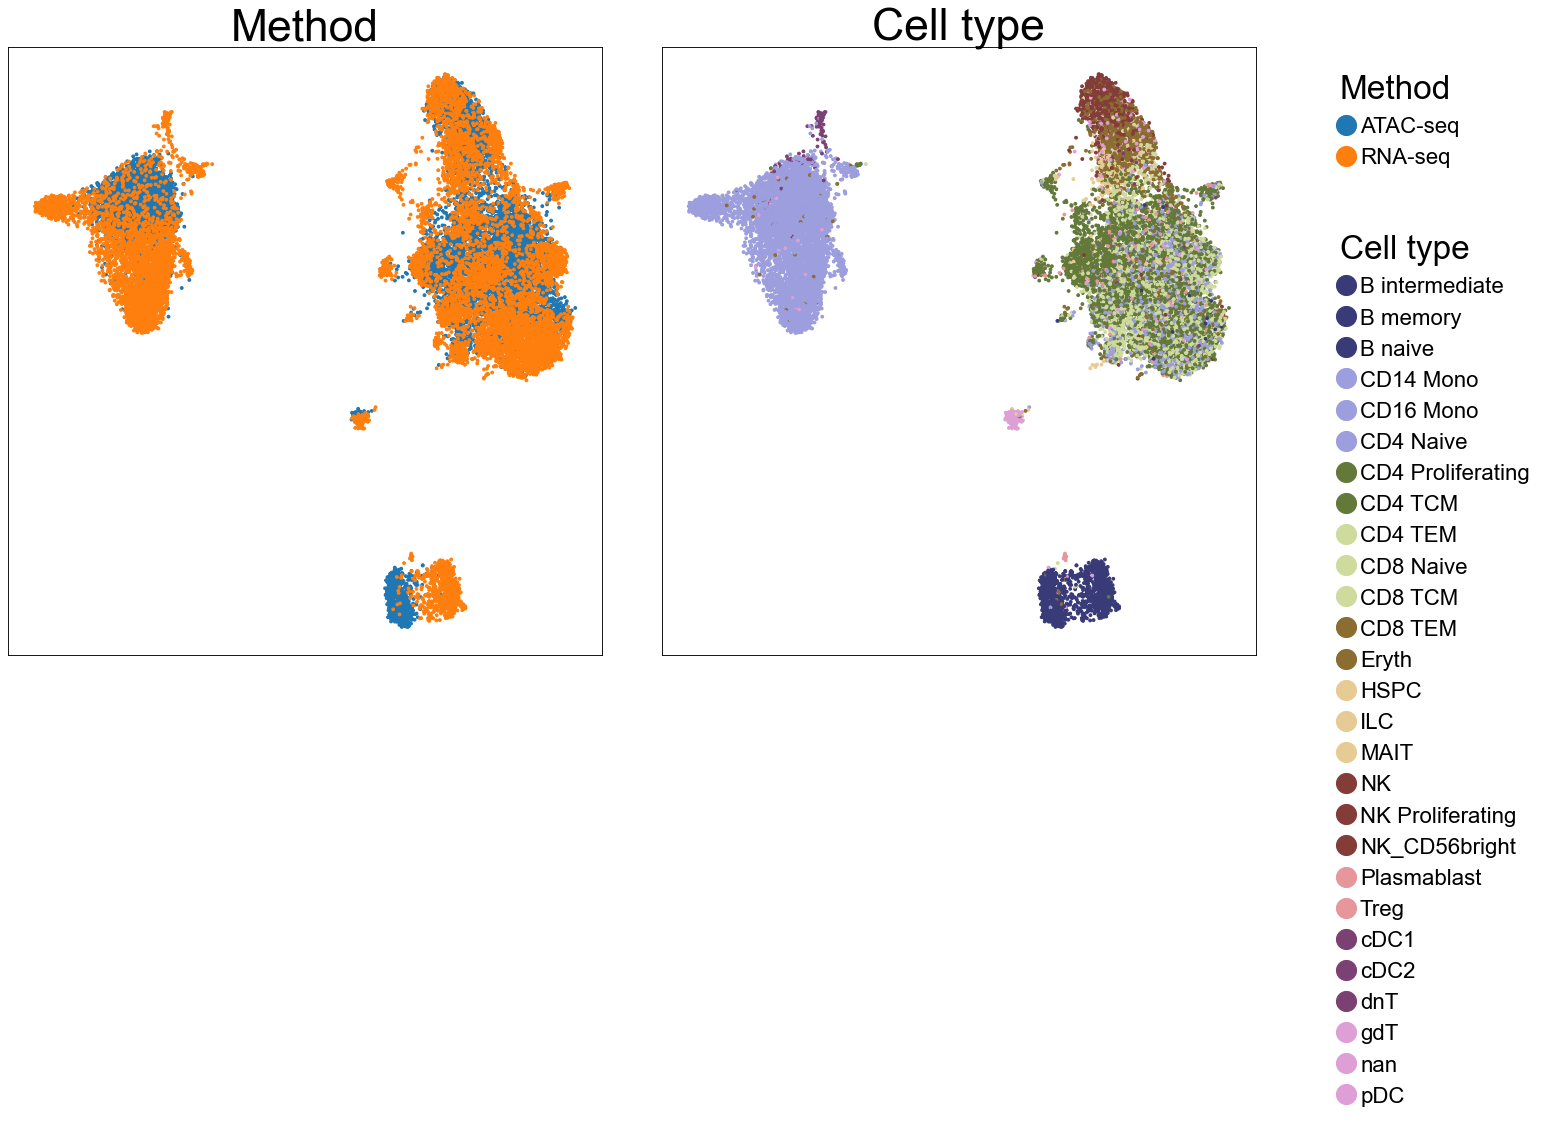

In [18]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl
import umap
import anndata

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]

rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new


meta.loc[meta.cell_type.values.astype(str) == "unknown", "cell_type"] = "Unknown"
meta.loc[meta.data_type.values.astype(str) == "rna", "data_type"] = "RNA-seq"
meta.loc[meta.data_type.values.astype(str) == "atac", "data_type"] = "ATAC-seq"


n_cells = embedding.shape[0]
if n_cells >= 15000:
    size = 120000 / n_cells
else:
    size = 8

le = preprocessing.LabelEncoder()
le.fit(sorted(set(meta["data_type"])))
label = le.fit_transform(meta["data_type"].values)
colours = ListedColormap(["tab:blue", "tab:orange"])

le2 = preprocessing.LabelEncoder()
le2.fit(sorted(set(meta["cell_type"])))
label2 = le.fit_transform(meta["cell_type"].values)
colours2 = ListedColormap(rgb2hex_20b_new)


f = plt.figure(figsize=(20,10))

ax1 = f.add_subplot(1,2,1)
scatter1 = ax1.scatter(embedding[:, 0][::-1], embedding[:, 1][::-1], s=size, c=label[::-1], cmap=colours, label=meta["data_type"].values[::-1])
ax1.set_title("Method", fontsize=40)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
# celltype
ax12 = f.add_subplot(1,2,2)
scatter2 = ax12.scatter(embedding[:, 0], embedding[:, 1], s=size, c=label2, cmap=colours2, label=meta["cell_type"].values)
ax12.set_title("Cell type", fontsize=40)
ax12.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


l1 = f.legend(handles=scatter1.legend_elements()[0], labels=sorted(set(meta["data_type"])), loc="upper left", bbox_to_anchor=(1.0, 0.9), 
              markerscale=3., title_fontsize=30, fontsize=20, frameon=False, ncol=1, title="Method")
l2 = f.legend(handles=scatter2.legend_elements(num=len(sorted(set(meta["cell_type"]))))[0], labels=sorted(set(meta["cell_type"])), loc="upper left", bbox_to_anchor=(1.0, 0.7), 
              markerscale=3., title_fontsize=30, fontsize=20, frameon=False, ncol=1, title="Cell type")
l1._legend_box.align = "left"
l2._legend_box.align = "left"

f.subplots_adjust(hspace=.1, wspace=.1)


In [20]:
adata_atac.X

<10846x164675 sparse matrix of type '<class 'numpy.float32'>'
	with 100600516 stored elements in Compressed Sparse Row format>

In [14]:
adata_atac.obs

,cell_type,data_type
GGAGTCTGTGAGCAAG-1,CD8 Naive,atac
GTTAAGTGTCACTCGC-1,B intermediate,atac
GGTTGCGGTAAACAAG-1,CD14 Mono,atac
GGTTGCATCCTGGCTT-1,Eryth,atac
TGTTCCTCATAAGTTC-1,CD14 Mono,atac
...,...,...
TTGCAATCACCACAAC-1,nan,atac
GGACGGATCAGGCTAT-1,B intermediate,atac
TGAAGGATCTTTGAGA-1,nan,atac
CCTGTATGTTGGTGAC-1,nan,atac


In [17]:
adata_rna

AnnData object with n_obs × n_vars = 11898 × 29717
    obs: 'cell_type', 'data_type'

In [19]:
adata_rna.X

<11898x29717 sparse matrix of type '<class 'numpy.float32'>'
	with 23512601 stored elements in Compressed Sparse Row format>

In [18]:
adata_rna.obs

,cell_type,data_type
AAACAGCCAAGGAATC-1,CD4 TCM,rna
AAACAGCCAATCCCTT-1,CD4 TCM,rna
AAACAGCCAATGCGCT-1,CD4 Naive,rna
AAACAGCCACACTAAT-1,CD8 Naive,rna
AAACAGCCACCAACCG-1,CD8 Naive,rna
...,...,...
TTTGTTGGTGTTAAAC-1,CD8 Naive,rna
TTTGTTGGTTAGGATT-1,NK,rna
TTTGTTGGTTGCAGTA-1,CD4 TCM,rna
TTTGTTGGTTGGTTAG-1,CD4 TCM,rna
